In [10]:
words = '高鐵辦捐血活動 董座江耀宗帶頭挽袖'
seg = jieba.cut(words)
print(" ".join(seg))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Wade\AppData\Local\Temp\jieba.cache
Loading model cost 0.768 seconds.
Prefix dict has been built succesfully.


'高鐵辦 捐血 活動   董座 江耀宗 帶頭 挽袖'

### 增加特定詞彙

In [2]:
jieba.load_userdict("user.txt")

### 移除符號(像是冒號與問號)和數字
python regex移除數字

In [5]:
import re
some_text = 'test:123?'
re.sub("\d+|\?|\:", "", some_text)

'test'

---

## 1. 讀取csv並切割字串

In [12]:
import csv
import jieba

strings = []
labels = []

with open('sentences.csv', newline='') as csvfile:
  rows = csv.reader(csvfile)
  for row in rows:
    strings.append(" ".join(jieba.cut(re.sub("\d+|\?|\:|\？|\\r\\n", "", row[0]))))

In [14]:
strings

['高鐵辦 捐血 活動   董座 江耀宗 帶頭 挽袖',
 '高鐵局 ： 延伸 花 億   到 屏東 只 快 分鐘',
 '高鐵 延至 屏東 恐花 億元 、 卻 只 比台 鐵快 分鐘',
 '機 捷通 車   台北 車站 成大迷 宮台 鐵 ： 將改進',
 '高鐵 捐血 傳愛     董事 長 帶頭作 公益',
 '高雄捷 運去 年度 首度 盈餘萬元',
 '桃捷 徵才 逾 萬人 報考     錄取 率僅 %',
 '爭取 高鐵到 屏東   青年 組聯盟 號召 支持',
 '高捷 賺 了     衝運量 兼 擴大勞務',
 '機捷 A 台北 站 轉乘     吉祥物 VR 影片 來 帶路',
 '催淚   視障 女 高鐵站 為 阿母 獻 唱 「 感謝 你 的 愛 」',
 '周一 晨間 列車 自由 座     高鐵 增為 節車 廂',
 '高鐵班 周一 晨間 列車 加開 自由 座   運能 提升',
 '北捷 雞 年 紀念 車票     日開 賣',
 '傳聞 多   桃 市府 日 公布 機捷 正式 通車 時間',
 '機捷 何時 通車     桃捷 日 宣布',
 '機捷 可望 元宵 通車   桃捷 ： 尚未 取得 營運許 可 \u3000',
 '機捷 履勘 改善 完成     交部將 發營 運許 可',
 '三鐵共站 動線 不 友善     議員促 左營 站 改善',
 '二二八 連假 高鐵 加班 車     日 凌晨 賣',
 '高鐵 周年   外籍 顧問 自發 揪 團回 台灣',
 '高鐵連假 加班 車   周六 開放 訂票',
 '機場 捷運營 運許 可及 通車 時間     日 公布',
 '張 花冠 宣布   日起 至 元宵 節兩條 電動 公車 路線 免費 搭',
 '機場 捷運何 時通 鄭文燦 ： 今年 月初',
 '機捷 試營運 方案   下午 A 站 說 明細節',
 '記者 團試 乘 機捷 直達車   實測 到 機場 時間 是 ...',
 '機捷試 乘遇 地震     減速 慢行 秒',
 '桃園 機場 捷運 ／ 試營運   ／ 正式 通車',
 '機捷 / 起試 營運個 月   / 正式 營運',
 '機捷 試營運 / 預辦 登機   限時 後 航班',
 '機捷 免費試 乘團 體限站   自由 行全線 進出',
 '機 捷通 車成 真 

## 2. 讀取切好字的csv

In [1]:
import numpy as np
import pandas as pd
# 避免 tf warning的顯示
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

DF = pd.read_csv('title1-8_final.csv')
DF.head()

,Title,Title_CKIP,Category
0,捷運間隔5分鐘放人進站 人潮塞爆國父紀念館站,捷運 間隔 5分鐘 放 人 進站 人潮 塞爆 國父 紀念館 站,t
1,高捷延至兩點收班 夢時代跨年人潮1小時散去,高捷 延至 兩 點收 班 夢時代 跨年 人潮 1 小時 散去,t
2,31日北捷運量226.7萬人 比前年少40萬人,31 日 北 捷運 量 226.7 萬 人 比 前 年少 40萬 人,t
3,北捷跨年輸運減少38萬人次 是因假日沒上班族,北捷 跨年 輸運 減少 38萬 人次 是 因 假日 沒 上班族,t
4,元旦連假收尾 高鐵烏日站午後湧人潮,元旦 連假 收尾 高鐵 烏日站 午後 湧 人潮,t


In [20]:
DF.isnull().sum()

Title         1
Title_CKIP    1
Category      1
dtype: int64

Drop整row na

In [2]:
DF.dropna(axis=0, inplace=True)

In [3]:
segement = DF['Title_CKIP'].copy()
segement = segement.astype(str)
label = DF['Category'].copy()

#### 檢視資料類別占比

In [4]:
DF.groupby('Category').size()/ len(DF)

Category
e    0.246037
o    0.443143
s    0.082012
t    0.228808
dtype: float64

#### label做one hot

In [4]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# le = LabelEncoder()
# label_le = le.fit_transform(label)

one_hot = OneHotEncoder()
label_ohe = one_hot.fit_transform(DF[['Category']])
label_ohe_array = label_ohe.toarray()
print(label_ohe_array)
print(one_hot.get_feature_names())

[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 ...
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]
['x0_e' 'x0_o' 'x0_s' 'x0_t']


In [38]:
segement.values[0]

'捷運\u3000間隔\u30005分鐘\u3000放\u3000人\u3000進站\u3000人潮\u3000塞爆\u3000國父\u3000紀念館\u3000站'

**將\u3000以空格取代**

In [5]:
import re
for index in range(segement.size):
    segement.values[index] = re.sub("\\u3000", " ", segement.values[index])
    segement.values[index] = re.sub("\d+|\?|\:|\？|\「|\」|\！|\：|\、|\【|\】", "", segement.values[index])

In [43]:
segement.values[0]

'捷運 間隔 5分鐘 放 人 進站 人潮 塞爆 國父 紀念館 站'

#### Tokenize and to numbers

In [6]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(segement.values)
string_sequences = tokenizer.texts_to_sequences(segement.values)

Using TensorFlow backend.


顯示字典

In [8]:
tokenizer.word_index

{'高鐵': 1,
 '捷運': 2,
 '機捷': 3,
 '北捷': 4,
 '加開': 5,
 '列車': 6,
 '站': 7,
 '日': 8,
 '搭': 9,
 '疏運': 10,
 '折': 11,
 '人': 12,
 '優惠': 13,
 '月': 14,
 '班': 15,
 '通車': 16,
 '起': 17,
 '旅客': 18,
 '不': 19,
 '桃捷': 20,
 '一': 21,
 '了': 22,
 '班次': 23,
 '連假': 24,
 '人潮': 25,
 '將': 26,
 '機場捷運': 27,
 '營運': 28,
 '最': 29,
 '年': 30,
 '開放': 31,
 '萬': 32,
 '票': 33,
 '有': 34,
 '高捷': 35,
 '再': 36,
 '乘': 37,
 '車': 38,
 '試': 39,
 '台北': 40,
 '搶': 41,
 '春節': 42,
 '個': 43,
 '到': 44,
 '元': 45,
 '班車': 46,
 '免費': 47,
 '推': 48,
 '北上': 49,
 '今': 50,
 '台灣高鐵': 51,
 '首': 52,
 '台鐵': 53,
 '要': 54,
 '可': 55,
 '民眾': 56,
 '台灣': 57,
 '柯': 58,
 '送': 59,
 '開': 60,
 '凌晨': 61,
 '的': 62,
 '輕': 63,
 '車票': 64,
 '桃園': 65,
 '北': 66,
 '是': 67,
 '自由座': 68,
 '開賣': 69,
 '快': 70,
 '車廂': 71,
 '跨年': 72,
 '前': 73,
 '元旦': 74,
 '票價': 75,
 '新': 76,
 '被': 77,
 '加班車': 78,
 '天': 79,
 '全': 80,
 '軌道': 81,
 '捷': 82,
 '高': 83,
 '多': 84,
 '大': 85,
 '公車': 86,
 '遭': 87,
 '軌': 88,
 '在': 89,
 '台中': 90,
 '更': 91,
 '人次': 92,
 '沒': 93,
 '台南': 94,
 '與': 95,
 '這': 96,
 

檢查詞頻

In [8]:
tokenizer.word_counts

OrderedDict([('捷運', 222),
             ('間隔', 1),
             ('5分鐘', 1),
             ('放', 4),
             ('人', 68),
             ('進站', 2),
             ('人潮', 49),
             ('塞爆', 4),
             ('國父', 1),
             ('紀念館', 1),
             ('站', 101),
             ('高捷', 43),
             ('延至', 4),
             ('兩', 18),
             ('點收', 1),
             ('班', 64),
             ('夢時代', 2),
             ('跨年', 25),
             ('1', 30),
             ('小時', 13),
             ('散去', 1),
             ('31', 3),
             ('日', 42),
             ('北', 28),
             ('量', 5),
             ('226', 1),
             ('7', 14),
             ('萬', 12),
             ('比', 17),
             ('前', 25),
             ('年少', 1),
             ('40萬', 1),
             ('北捷', 129),
             ('輸運', 1),
             ('減少', 1),
             ('38萬', 1),
             ('人次', 22),
             ('是', 28),
             ('因', 6),
             ('假日', 6),
             ('沒', 22),
   

輸入的資料筆數(row)

In [9]:
tokenizer.document_count

1451

dictionary實際size

In [10]:
len(tokenizer.word_index)

4020

**截長補短**

In [7]:
from keras.preprocessing import sequence

sequence_padded = sequence.pad_sequences(string_sequences, maxlen=15)
sequence_padded

array([[   0,    0,    0, ..., 1643, 1644,    7],
       [   0,    0,    0, ...,   25,  159, 1646],
       [   0,    0,    0, ..., 1647,   32,   12],
       ...,
       [   0,    0,    0, ..., 1640, 1641,    7],
       [   0,    0,    0, ..., 1640, 1641,    7],
       [   0,    0,    0, ...,  507,  698,  912]])

In [10]:
sequence_padded.shape

(1452, 15)

切割測試集與訓練集

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(sequence_padded, label_ohe, test_size=0.3, random_state=42)

**檢查詞頻(另一種方式)**

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
cv_result = cv.fit_transform(segement.values)

words = cv.get_feature_names()
# 計算詞頻
frequency = cv_result.toarray().sum(axis=0)

In [17]:
WordDF =  pd.DataFrame(
    {'Words': words,
     'Frequency': frequency
    })

WordDF.sort_values(by=['Frequency'], ascending=False).head(10)

,Words,Frequency
3455,高鐵,653
1530,捷運,222
1941,機捷,154
708,北捷,129
677,加開,117
624,列車,112
2283,疏運,74
521,優惠,68
3056,通車,63
1734,旅客,61


### Embedding layer

將數字list轉化為vector list

#### input length由句子長度決定, input dim由字典數決定

### MLP

In [9]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation,Flatten
from keras.layers.embeddings import Embedding

model_MLP = Sequential()

model_MLP.add(Embedding(output_dim=64, input_dim=len(tokenizer.word_index), input_length=15))
model_MLP.add(Dropout(0.2))

model_MLP.add(Flatten())

model_MLP.add(Dense(units=128, activation='relu' ))
model_MLP.add(Dense(units=64, activation='relu' ))
model_MLP.add(Dense(units=32, activation='relu' ))
model_MLP.add(Dropout(0.4))

model_MLP.add(Dense(units=4, activation='softmax' ))

model_MLP.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 15, 64)            257280    
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 64)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 960)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               123008    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)      

In [10]:
model_MLP.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
train_history_MLP = model_MLP.fit(X_train, y_train,batch_size=30, epochs=40,verbose=2, validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 812 samples, validate on 203 samples
Epoch 1/40
 - 3s - loss: 1.3299 - acc: 0.3633 - val_loss: 1.2000 - val_acc: 0.5172
Epoch 2/40
 - 0s - loss: 1.2478 - acc: 0.4249 - val_loss: 1.1462 - val_acc: 0.5320
Epoch 3/40
 - 0s - loss: 1.0688 - acc: 0.5714 - val_loss: 0.9992 - val_acc: 0.6059
Epoch 4/40
 - 0s - loss: 0.6531 - acc: 0.7611 - val_loss: 0.8767 - val_acc: 0.6404
Epoch 5/40
 - 0s - loss: 0.3172 - acc: 0.9039 - val_loss: 0.8097 - val_acc: 0.6897
Epoch 6/40
 - 0s - loss: 0.1163 - acc: 0.9754 - val_loss: 0.8359 - val_acc: 0.7291
Epoch 7/40
 - 0s - loss: 0.0459 - acc: 0.9914 - val_loss: 0.9974 - val_acc: 0.6995
Epoch 8/40
 - 0s - loss: 0.0425 - acc: 0.9901 - val_loss: 1.0058 - val_acc: 0.7044
Epoch 9/40
 - 0s - loss: 0.0324 - acc: 0.9963 - val_loss: 0.9526 - val_acc: 0.7389
Epoch 10/40
 - 0s - loss: 0.0356 - acc: 0.9914 - val_loss: 0.9976 - val_acc: 0.7340
Epoch 11/40
 - 0s - loss: 0.0237 - acc: 0.9951 - val_loss: 1.1173 - val_acc

In [11]:
model_MLP.evaluate(X_test, y_test)

436/436 [==============================] - 0s 48us/step


[1.5536030651232517, 0.6766055051339875]

### RNN

In [10]:
from keras.layers.recurrent import SimpleRNN
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation,Flatten
from keras.layers.embeddings import Embedding

model_RNN = Sequential()

model_RNN.add(Embedding(output_dim=64, input_dim=len(tokenizer.word_index), input_length=15))

model_RNN.add(SimpleRNN(64))
model_RNN.add(Dense(units=32, activation='relu'))

model_RNN.add(Dense(units=4, activation='softmax'))

model_RNN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 15, 64)            257280    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 132       
Total params: 267,748
Trainable params: 267,748
Non-trainable params: 0
_________________________________________________________________


In [12]:
model_RNN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
train_history_RNN = model_RNN.fit(X_train, y_train,batch_size=30, epochs=10,verbose=2, validation_split=0.2)

Train on 812 samples, validate on 203 samples
Epoch 1/10
 - 1s - loss: 0.0081 - acc: 0.9988 - val_loss: 1.7308 - val_acc: 0.5616
Epoch 2/10
 - 0s - loss: 0.0030 - acc: 0.9988 - val_loss: 1.5820 - val_acc: 0.5764
Epoch 3/10
 - 0s - loss: 0.0154 - acc: 0.9951 - val_loss: 1.9336 - val_acc: 0.5764
Epoch 4/10
 - 0s - loss: 0.0110 - acc: 0.9975 - val_loss: 1.8142 - val_acc: 0.5074
Epoch 5/10
 - 0s - loss: 0.0026 - acc: 0.9975 - val_loss: 1.6010 - val_acc: 0.5369
Epoch 6/10
 - 0s - loss: 0.0027 - acc: 0.9988 - val_loss: 1.6295 - val_acc: 0.5468
Epoch 7/10
 - 0s - loss: 0.0024 - acc: 0.9975 - val_loss: 1.6695 - val_acc: 0.5320
Epoch 8/10
 - 0s - loss: 0.0028 - acc: 0.9988 - val_loss: 1.6876 - val_acc: 0.5320
Epoch 9/10
 - 0s - loss: 0.0029 - acc: 0.9975 - val_loss: 1.7037 - val_acc: 0.5419
Epoch 10/10
 - 0s - loss: 0.0041 - acc: 0.9988 - val_loss: 1.7489 - val_acc: 0.5074


In [13]:
model_RNN.evaluate(X_test, y_test)

436/436 [==============================] - 0s 183us/step


[1.558807104005726, 0.5963302757761894]

### LSTM

In [14]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation,Flatten
from keras.layers.embeddings import Embedding
from keras.layers import Bidirectional, CuDNNLSTM

model_LSTM = Sequential()

model_LSTM.add(Embedding(output_dim=128, input_dim=len(tokenizer.word_index), input_length=15))
model_LSTM.add(Dropout(0.4))

model_LSTM.add(CuDNNLSTM(32, return_sequences=True))
model_LSTM.add(CuDNNLSTM(32, return_sequences=True))
model_LSTM.add(CuDNNLSTM(32, return_sequences=False))

model_LSTM.add(Dense(units=50, activation='relu' ))
model_LSTM.add(Dropout(0.4))
model_LSTM.add(Dense(units=4, activation='softmax' ))

model_LSTM.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 15, 128)           514560    
_________________________________________________________________
dropout_3 (Dropout)          (None, 15, 128)           0         
_________________________________________________________________
cu_dnnlstm_1 (CuDNNLSTM)     (None, 15, 32)            20736     
_________________________________________________________________
cu_dnnlstm_2 (CuDNNLSTM)     (None, 15, 32)            8448      
_________________________________________________________________
cu_dnnlstm_3 (CuDNNLSTM)     (None, 32)                8448      
_________________________________________________________________
dense_7 (Dense)              (None, 50)                1650      
_________________________________________________________________
dropout_4 (Dropout)          (None, 50)                0         
__________

**有做one hot的label就不能用loss = sparse_categorical_crossentropy**

> https://stackoverflow.com/questions/49392972/error-when-checking-target-expected-dense-3-to-have-shape-3-but-got-array-wi

In [17]:
model_LSTM.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
train_history_LSTM = model_LSTM.fit(X_train, y_train, batch_size=50, epochs=10, verbose=2, validation_split=0.2)

Train on 812 samples, validate on 203 samples
Epoch 1/10
 - 1s - loss: 0.4058 - acc: 0.8596 - val_loss: 1.2459 - val_acc: 0.6305
Epoch 2/10
 - 0s - loss: 0.3653 - acc: 0.8732 - val_loss: 1.3464 - val_acc: 0.6305
Epoch 3/10
 - 0s - loss: 0.2869 - acc: 0.8966 - val_loss: 1.4805 - val_acc: 0.6256
Epoch 4/10
 - 0s - loss: 0.1989 - acc: 0.9286 - val_loss: 1.6682 - val_acc: 0.6158
Epoch 5/10
 - 0s - loss: 0.1862 - acc: 0.9470 - val_loss: 1.7681 - val_acc: 0.6453
Epoch 6/10
 - 0s - loss: 0.1489 - acc: 0.9557 - val_loss: 1.9020 - val_acc: 0.5911
Epoch 7/10
 - 0s - loss: 0.1076 - acc: 0.9754 - val_loss: 1.9741 - val_acc: 0.6108
Epoch 8/10
 - 0s - loss: 0.1073 - acc: 0.9729 - val_loss: 2.2169 - val_acc: 0.5468
Epoch 9/10
 - 0s - loss: 0.0729 - acc: 0.9852 - val_loss: 2.2017 - val_acc: 0.5714
Epoch 10/10
 - 0s - loss: 0.1111 - acc: 0.9680 - val_loss: 2.0054 - val_acc: 0.5616


In [16]:
model_LSTM.evaluate(X_test, y_test)

436/436 [==============================] - 0s 108us/step


[1.276198174975334, 0.5871559638495839]

### GRU

In [18]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.embeddings import Embedding
from keras.layers import GRU

model_GRU = Sequential()

model_GRU.add(Embedding(output_dim=128, input_dim=len(tokenizer.word_index), input_length=15))
model_GRU.add(Dropout(0.4))

# model_GRU.add(GRU(32, return_sequences=True))
model_GRU.add(GRU(32, return_sequences=False))

model_GRU.add(Dense(units=50, activation='relu' ))
model_GRU.add(Dropout(0.4))
model_GRU.add(Dense(units=4, activation='softmax' ))

model_GRU.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 15, 128)           514560    
_________________________________________________________________
dropout_5 (Dropout)          (None, 15, 128)           0         
_________________________________________________________________
gru_1 (GRU)                  (None, 32)                15456     
_________________________________________________________________
dense_9 (Dense)              (None, 50)                1650      
_________________________________________________________________
dropout_6 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 204       
Total params: 531,870
Trainable params: 531,870
Non-trainable params: 0
_________________________________________________________________


In [19]:
model_GRU.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
train_history_GRU = model_GRU.fit(X_train, y_train, batch_size=50, epochs=10, verbose=2, validation_split=0.2)

Train on 812 samples, validate on 203 samples
Epoch 1/10
 - 1s - loss: 1.3689 - acc: 0.4113 - val_loss: 1.3271 - val_acc: 0.5813
Epoch 2/10
 - 0s - loss: 1.2990 - acc: 0.4655 - val_loss: 1.2128 - val_acc: 0.5961
Epoch 3/10
 - 0s - loss: 1.1581 - acc: 0.5099 - val_loss: 1.0117 - val_acc: 0.6305
Epoch 4/10
 - 0s - loss: 0.8832 - acc: 0.6219 - val_loss: 0.8331 - val_acc: 0.7044
Epoch 5/10
 - 0s - loss: 0.5751 - acc: 0.7771 - val_loss: 0.7764 - val_acc: 0.7241
Epoch 6/10
 - 0s - loss: 0.3646 - acc: 0.8830 - val_loss: 0.7976 - val_acc: 0.7241
Epoch 7/10
 - 0s - loss: 0.2328 - acc: 0.9076 - val_loss: 0.8104 - val_acc: 0.7389
Epoch 8/10
 - 0s - loss: 0.1835 - acc: 0.9113 - val_loss: 0.9542 - val_acc: 0.7635
Epoch 9/10
 - 0s - loss: 0.1445 - acc: 0.9200 - val_loss: 0.9382 - val_acc: 0.7586
Epoch 10/10
 - 0s - loss: 0.1120 - acc: 0.9643 - val_loss: 0.9816 - val_acc: 0.7340


In [20]:
model_GRU.evaluate(X_test, y_test)

436/436 [==============================] - 0s 234us/step


[1.0514832527265636, 0.7041284403669725]

### Bidirectional

In [21]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.embeddings import Embedding
from keras.layers import GRU, Bidirectional

model_bi = Sequential()

model_bi.add(Embedding(output_dim=128, input_dim=len(tokenizer.word_index), input_length=15))
model_bi.add(Dropout(0.4))

# model_bi.add(Bidirectional(GRU(32, return_sequences=True)))
model_bi.add(Bidirectional(GRU(32)))

model_bi.add(Dense(units=50, activation='relu'))
model_bi.add(Dropout(0.4))
model_bi.add(Dense(units=4, activation='softmax'))

model_bi.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 15, 128)           514560    
_________________________________________________________________
dropout_7 (Dropout)          (None, 15, 128)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                30912     
_________________________________________________________________
dense_11 (Dense)             (None, 50)                3250      
_________________________________________________________________
dropout_8 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 4)                 204       
Total params: 548,926
Trainable params: 548,926
Non-trainable params: 0
_________________________________________________________________


In [22]:
model_bi.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
train_history_bi = model_bi.fit(X_train, y_train, batch_size=50, epochs=10, verbose=2, validation_split=0.2)

Train on 812 samples, validate on 203 samples
Epoch 1/10
 - 2s - loss: 1.3383 - acc: 0.3916 - val_loss: 1.2382 - val_acc: 0.5172
Epoch 2/10
 - 0s - loss: 1.2604 - acc: 0.4261 - val_loss: 1.1592 - val_acc: 0.5172
Epoch 3/10
 - 0s - loss: 1.1783 - acc: 0.4901 - val_loss: 1.0577 - val_acc: 0.6355
Epoch 4/10
 - 0s - loss: 0.9707 - acc: 0.6133 - val_loss: 0.9110 - val_acc: 0.6650
Epoch 5/10
 - 0s - loss: 0.6818 - acc: 0.7488 - val_loss: 0.8889 - val_acc: 0.6650
Epoch 6/10
 - 0s - loss: 0.4682 - acc: 0.8534 - val_loss: 0.9376 - val_acc: 0.6552
Epoch 7/10
 - 0s - loss: 0.3293 - acc: 0.8867 - val_loss: 0.9893 - val_acc: 0.6108
Epoch 8/10
 - 0s - loss: 0.2137 - acc: 0.9113 - val_loss: 0.9717 - val_acc: 0.6847
Epoch 9/10
 - 0s - loss: 0.1394 - acc: 0.9581 - val_loss: 1.0653 - val_acc: 0.6453
Epoch 10/10
 - 0s - loss: 0.0908 - acc: 0.9766 - val_loss: 1.2551 - val_acc: 0.6749


In [23]:
model_bi.evaluate(X_test, y_test)

436/436 [==============================] - 0s 309us/step


[1.1369591327982211, 0.6903669735707274]

### 1D CNN

In [24]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import Conv1D, GlobalMaxPooling1D, MaxPooling1D
from keras.layers.embeddings import Embedding

model_CNN = Sequential()

model_CNN.add(Embedding(output_dim=64, input_dim=len(tokenizer.word_index), input_length=15))

model_CNN.add(Conv1D(64, 5, activation='relu'))
model_CNN.add(MaxPooling1D())
model_CNN.add(Conv1D(64, 5, activation='relu'))
model_CNN.add(GlobalMaxPooling1D())
model_CNN.add(Dense(4, activation='softmax'))
model_CNN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 15, 64)            257280    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 11, 64)            20544     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 5, 64)             0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 1, 64)             20544     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 64)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 4)                 260       
Total params: 298,628
Trainable params: 298,628
Non-trainable params: 0
_________________________________________________________________


In [25]:
model_CNN.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_history_CNN = model_CNN.fit(X_train, y_train, batch_size=30, epochs=10, verbose=2, validation_split=0.2)

Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Train on 812 samples, validate on 203 samples
Epoch 1/10
 - 1s - loss: 0.5399 - acc: 0.7500 - val_loss: 0.4934 - val_acc: 0.7500
Epoch 2/10
 - 0s - loss: 0.4932 - acc: 0.7651 - val_loss: 0.4546 - val_acc: 0.7943
Epoch 3/10
 - 0s - loss: 0.3758 - acc: 0.8458 - val_loss: 0.3844 - val_acc: 0.8498
Epoch 4/10
 - 0s - loss: 0.1924 - acc: 0.9526 - val_loss: 0.3536 - val_acc: 0.8633
Epoch 5/10
 - 0s - loss: 0.0925 - acc: 0.9692 - val_loss: 0.3526 - val_acc: 0.8670
Epoch 6/10
 - 0s - loss: 0.0456 - acc: 0.9849 - val_loss: 0.4050 - val_acc: 0.8510
Epoch 7/10
 - 0s - loss: 0.0183 - acc: 0.9975 - val_loss: 0.4499 - val_acc: 0.8424
Epoch 8/10
 - 0s - loss: 0.0086 - acc: 0.9988 - val_loss: 0.4805 - val_acc: 0.8522
Epoch 9/10
 - 0s - loss: 0.0055 - acc: 0.9994 - val_loss: 0.5253 - val_acc: 0.8300
Epoch 10/10
 - 0s - loss: 0.0156 - acc: 0.9951 - val_loss: 0.5858 - val_acc: 0.8424


In [26]:
model_CNN.evaluate(X_test, y_test)

436/436 [==============================] - 0s 62us/step


[0.5895665654348671, 0.8308486244000426]

### CNN-LSTM

In [27]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import Conv1D, MaxPooling1D, CuDNNLSTM
from keras.layers.embeddings import Embedding

model_CNN_LSTM = Sequential()

model_CNN_LSTM.add(Embedding(output_dim=64, input_dim=len(tokenizer.word_index), input_length=15))
model_CNN_LSTM.add(Dropout(0.4))

model_CNN_LSTM.add(Conv1D(64, 5, activation='relu'))
model_CNN_LSTM.add(MaxPooling1D())

model_CNN_LSTM.add(CuDNNLSTM(32))

model_CNN_LSTM.add(Dense(4, activation='softmax'))
model_CNN_LSTM.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 15, 64)            257280    
_________________________________________________________________
dropout_9 (Dropout)          (None, 15, 64)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 11, 64)            20544     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 5, 64)             0         
_________________________________________________________________
cu_dnnlstm_4 (CuDNNLSTM)     (None, 32)                12544     
_________________________________________________________________
dense_14 (Dense)             (None, 4)                 132       
Total params: 290,500
Trainable params: 290,500
Non-trainable params: 0
_________________________________________________________________


In [28]:
model_CNN_LSTM.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_history_CNN_LSTM = model_CNN_LSTM.fit(X_train, y_train, batch_size=30, epochs=10, verbose=2, validation_split=0.2)

Train on 812 samples, validate on 203 samples
Epoch 1/10
 - 1s - loss: 0.5382 - acc: 0.7500 - val_loss: 0.4917 - val_acc: 0.7500
Epoch 2/10
 - 0s - loss: 0.5077 - acc: 0.7509 - val_loss: 0.4669 - val_acc: 0.7525
Epoch 3/10
 - 0s - loss: 0.4252 - acc: 0.8150 - val_loss: 0.3792 - val_acc: 0.8362
Epoch 4/10
 - 0s - loss: 0.2615 - acc: 0.9079 - val_loss: 0.3443 - val_acc: 0.8658
Epoch 5/10
 - 0s - loss: 0.1445 - acc: 0.9510 - val_loss: 0.3498 - val_acc: 0.8584
Epoch 6/10
 - 0s - loss: 0.0930 - acc: 0.9677 - val_loss: 0.3738 - val_acc: 0.8510
Epoch 7/10
 - 0s - loss: 0.0571 - acc: 0.9763 - val_loss: 0.4224 - val_acc: 0.8571
Epoch 8/10
 - 0s - loss: 0.0345 - acc: 0.9923 - val_loss: 0.4572 - val_acc: 0.8498
Epoch 9/10
 - 0s - loss: 0.0342 - acc: 0.9898 - val_loss: 0.4959 - val_acc: 0.8399
Epoch 10/10
 - 0s - loss: 0.0148 - acc: 0.9966 - val_loss: 0.5082 - val_acc: 0.8510


In [29]:
model_CNN_LSTM.evaluate(X_test, y_test)

436/436 [==============================] - 0s 62us/step


[0.4752272506919476, 0.844036697794538]

### Attention

In [ ]:
from attention_utils import get_activations

np.random.seed(1337)  # for reproducibility
from keras.models import *
from keras.layers import Input, Dense, merge

### Transformer

In [30]:
from attention import Position_Embedding, Attention
from keras.models import Model
from keras.layers import *

S_inputs = Input(shape=(None,), dtype='int32')
embeddings = Embedding(len(tokenizer.word_index), 128)(S_inputs)
embeddings = Position_Embedding()(embeddings)  # 增加Position_Embedding能轻微提高准确率
O_seq = Attention(8, 16)([embeddings, embeddings, embeddings])
O_seq = GlobalAveragePooling1D()(O_seq)
O_seq = Dropout(0.5)(O_seq)
O_seq = Dense(units=50, activation='relu')(O_seq)
outputs = Dense(4, activation='softmax')(O_seq)

model = Model(inputs=S_inputs, outputs=outputs)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None)         0                                            
__________________________________________________________________________________________________
embedding_8 (Embedding)         (None, None, 128)    514560      input_1[0][0]                    
__________________________________________________________________________________________________
position__embedding_1 (Position (None, None, 128)    0           embedding_8[0][0]                
__________________________________________________________________________________________________
attention_1 (Attention)         (None, None, 128)    49152       position__embedding_1[0][0]      
                                                                 position__embedding_1[0][0]      
          

In [31]:
# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_history_attention = model.fit(X_train, y_train, batch_size=30, epochs=10, verbose=2, validation_split=0.2)

Train on 812 samples, validate on 203 samples
Epoch 1/10
 - 1s - loss: 0.5506 - acc: 0.7358 - val_loss: 0.4912 - val_acc: 0.7500
Epoch 2/10
 - 0s - loss: 0.5401 - acc: 0.7414 - val_loss: 0.5034 - val_acc: 0.7500
Epoch 3/10
 - 0s - loss: 0.5274 - acc: 0.7463 - val_loss: 0.4949 - val_acc: 0.7500
Epoch 4/10
 - 0s - loss: 0.5212 - acc: 0.7509 - val_loss: 0.4906 - val_acc: 0.7500
Epoch 5/10
 - 0s - loss: 0.5055 - acc: 0.7589 - val_loss: 0.4751 - val_acc: 0.7500
Epoch 6/10
 - 0s - loss: 0.4528 - acc: 0.7974 - val_loss: 0.4137 - val_acc: 0.8116
Epoch 7/10
 - 0s - loss: 0.3629 - acc: 0.8464 - val_loss: 0.3782 - val_acc: 0.8411
Epoch 8/10
 - 0s - loss: 0.2445 - acc: 0.9116 - val_loss: 0.2921 - val_acc: 0.8929
Epoch 9/10
 - 0s - loss: 0.1317 - acc: 0.9575 - val_loss: 0.3235 - val_acc: 0.8953
Epoch 10/10
 - 0s - loss: 0.0784 - acc: 0.9723 - val_loss: 0.3759 - val_acc: 0.8744


In [32]:
model.evaluate(X_test, y_test)

436/436 [==============================] - 0s 57us/step


[0.40330725279423074, 0.8681192655082143]

### Confusion Matrix

In [47]:
# 轉回oneHot前
y_test_og = one_hot.inverse_transform(y_test)
y_test_og

array([['o'],
       ['o'],
       ['t'],
       ['o'],
       ['o'],
       ['o'],
       ['t'],
       ['e'],
       ['e'],
       ['o'],
       ['s'],
       ['e'],
       ['e'],
       ['o'],
       ['o'],
       ['o'],
       ['o'],
       ['e'],
       ['o'],
       ['t'],
       ['t'],
       ['e'],
       ['o'],
       ['s'],
       ['o'],
       ['t'],
       ['o'],
       ['o'],
       ['o'],
       ['e'],
       ['o'],
       ['t'],
       ['t'],
       ['e'],
       ['o'],
       ['o'],
       ['o'],
       ['t'],
       ['o'],
       ['o'],
       ['e'],
       ['e'],
       ['o'],
       ['o'],
       ['e'],
       ['e'],
       ['t'],
       ['o'],
       ['o'],
       ['o'],
       ['t'],
       ['t'],
       ['o'],
       ['o'],
       ['s'],
       ['e'],
       ['o'],
       ['o'],
       ['e'],
       ['o'],
       ['s'],
       ['t'],
       ['o'],
       ['o'],
       ['s'],
       ['o'],
       ['t'],
       ['o'],
       ['o'],
       ['o'],
       ['e'],
      

In [78]:
# label轉成數值
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
y_test_le = le.fit_transform(y_test_og)
list(le.classes_)

C:\Users\Wade\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['e', 'o', 's', 't']

In [52]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_le, prediction)

array([[ 83,  14,   3,   7],
       [ 21, 128,  23,  22],
       [  3,  12,  20,   4],
       [  4,  18,   5,  69]], dtype=int64)

In [53]:
prediction = model_CNN_LSTM.predict_classes(X_test)
pd.crosstab(y_test_le, prediction, rownames=['Label'], colnames=['Predict'])

Predict,0,1,2,3
Label,,,,
0,83,14,3,7
1,21,128,23,22
2,3,12,20,4
3,4,18,5,69


### ROC curve

In [62]:
pd.get_dummies(prediction)

,0,1,2,3
0,0,1,0,0
1,0,1,0,0
2,0,0,0,1
3,0,1,0,0
4,0,0,0,1
5,0,0,0,1
6,0,0,0,1
7,1,0,0,0
8,1,0,0,0
9,0,1,0,0


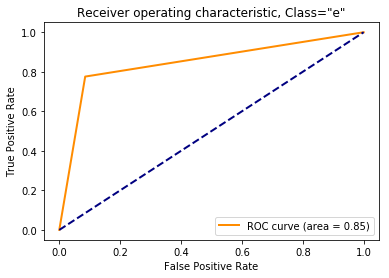

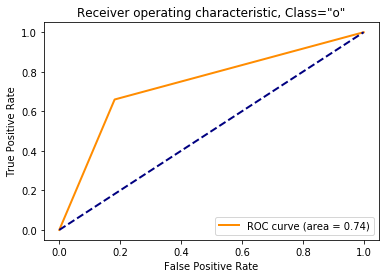

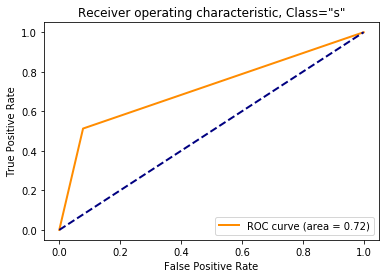

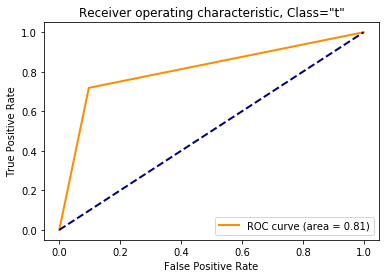

In [82]:
from sklearn.metrics import roc_curve, auc
%matplotlib inline
import matplotlib.pyplot as plt

pred_df = pd.get_dummies(prediction).values
y_test_le_df = pd.get_dummies(y_test_le).values

# for multi-class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(4):
    fpr[i], tpr[i], threshold = roc_curve(y_test_le_df[:, i], pred_df[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

for i in range(4):
    fig = plt.figure()
    lw = 2
    plt.plot(fpr[i], tpr[i], color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic, Class="{}"'.format(list(le.classes_)[i]))
    plt.legend(loc="lower right")

#### All in one

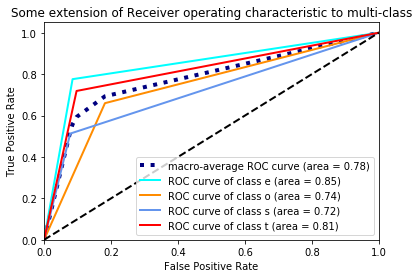

In [88]:
from scipy import interp
from itertools import cycle
# Compute macro-average ROC curve and ROC area
n_classes = 4
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(list(le.classes_)[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

### Train History

In [31]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='center right')
    plt.show()

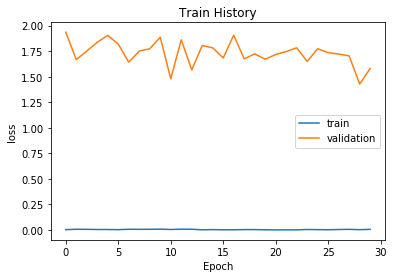

In [32]:
show_train_history(model_history_attention, 'loss', 'val_loss')

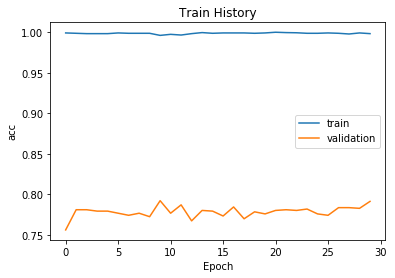

In [33]:
show_train_history(model_history_attention, 'acc', 'val_acc')

### Confusion Matrix

### Without Embedding